In [64]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from matplotlib.patches import Rectangle
import seaborn as sns
%matplotlib inline


sns.set_style("white")
sns.set_context("paper", font_scale=1.5,)

fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/figs2"

results_dir = os.path.abspath("/Users/crankshaw/clipper/experiments_logs/replica_scaling/")
# results_dir = os.path.abspath("/Users/crankshaw/clipper/experiments_logs/replica_scaling_big_batches/")
results_files = []

for name in os.listdir(results_dir):
    if "results" in name:
        results_files.append(name)
print results_files




['1_local_reps_0_remote_reps_160915-034943_results.json', '2_local_reps_0_remote_reps_160915-035043_results.json', '4_local_reps_0_remote_reps_160915-035152_results.json', '6_local_reps_0_remote_reps_160915-035325_results.json', '8_local_reps_0_remote_reps_160915-035513_results.json', '8_local_reps_2_remote_reps_160915-035722_results.json', '8_local_reps_4_remote_reps_160915-035957_results.json', '8_local_reps_6_remote_reps_160915-040257_results.json', '8_local_reps_8_remote_reps_160915-040615_results.json']


In [65]:
def is_replica_thru(n):
    return "model_thruput" in n and ("172" in n or "169" in n)

def get_all_thruputs(res):
    agg_thru = [m["rate"] for m in res["meters"] if "spark_svm:model_thruput" in m["name"]][0]
    rep_thrus = [m["rate"] for m in res["meters"] if is_replica_thru(m["name"])]
    return (agg_thru, np.array(rep_thrus))

def extract_results(i, df, fname):
    with open(os.path.join(results_dir, fname), "r") as f:
        splits = fname.split("_")
#         print splits
        local_reps = int(splits[0])
        remote_reps = int(splits[3])
        res = json.load(f)
        agg_thru, rep_thrus = get_all_thruputs(res)
        avg_thru = np.mean(rep_thrus)
        df.loc[i] = [local_reps+remote_reps, local_reps, remote_reps, agg_thru, avg_thru]
    return rep_thrus

df = pd.DataFrame(columns=("total_reps", "local_reps", "remote_reps", "aggregate_thru", "avg_thru"))
all_rep_thrus = [extract_results(i, df, r) for (i,r) in enumerate(results_files)]

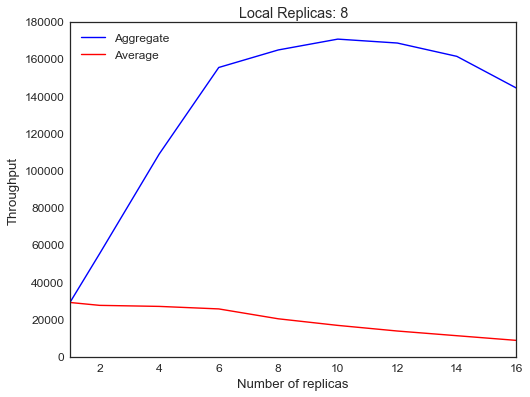

In [66]:
def plot_thruputs(df):
    colors = sns.cubehelix_palette(2, start=2.8, rot=-0.1)
    df.sort_values("total_reps", inplace=True)
    fig, ax = plt.subplots(figsize=(8,6))
    df.plot(x="total_reps", y="aggregate_thru", ax=ax, color="blue", label="Aggregate")
    df.plot(x="total_reps", y="avg_thru", ax=ax, color="red", label="Average")
    ax.set_ylabel("Throughput")
    ax.set_xlabel("Number of replicas")
    ax.set_title("Local Replicas: %d" % df["local_reps"].max())
    ax.legend(loc=0)
plot_thruputs(df)

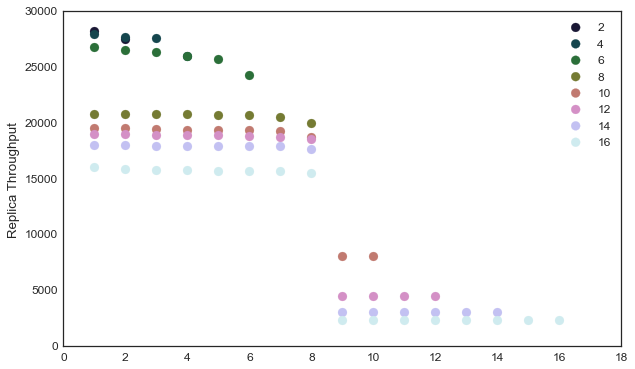

In [68]:
# colors = sns.cubehelix_palette(len(all_rep_thrus), start=2.8, rot=-0.1)
## Print distribution of replica throughputs

colors = sns.hls_palette(len(all_rep_thrus), l=.3, s=.8)
colors=sns.color_palette("cubehelix", 8)
fig, ax = plt.subplots(figsize=(10,6))
for (i,t) in enumerate(all_rep_thrus[1:]):
    t = sorted(t)
    t.reverse()
#     t.reverse()
    xs = np.arange(1, len(t)+1, 1)
#     print xs
    ax.scatter(xs, t, color=colors[i], s=80, label = "%d" % len(t))

ax.legend(loc=0)
ax.set_ylabel("Replica Throughput")
#     print t
#     sns.distplot(t,ax=ax, color=colors[i])

In [18]:
len(all_rep_thrus)

9

In [25]:
all_rep_thrus[3].sort()

In [26]:
all_rep_thrus[3]

array([ 24297.31866775,  25694.40199783,  26043.18932293,  26358.69576152,
        26527.96878845,  26839.13988534])